In [2]:
from __future__ import print_function

# standard imports
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.autograd import Variable

# for the MNIST Dataset
from torchvision import datasets, transforms

# gives a slight performance boost on GPU
import torch.backends.cudnn as cudnn

cudnn.benchmark = True
cudnn.fastest = True

# to plot loss
import matplotlib.pyplot as plt

# for timing
import timeit


In [7]:

##############################################################################
# CNN model definition (this is the standard approach to define the model, as a class)
##############################################################################
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # define all the components that will be used in the NN (these can be reused)
        self.conv1 = nn.Conv2d(1, 10, kernel_size=kernel_sz)  # 1 input feature, 10 output filters
        self.conv2 = nn.Conv2d(10, 20, kernel_size=kernel_sz)  # 10 input filters, 20 output filters
        self.mp = nn.MaxPool2d(2, padding=0)
        self.drop2D = nn.Dropout2d(p=0.25, inplace=False)
        self.fc1 = nn.Linear(320,
                             100)  # the 320 is dimensional result after max pooling and applying the kernel, 10 outputs
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        # define the acutal network
        in_size = x.size(0)  # this is the batch size
        # you can chain function together to form the layers
        x = F.relu(self.mp(self.conv1(x)))
        x = F.relu(self.mp(self.conv2(x)))
        x = self.drop2D(x)
        x = x.view(in_size, -1)  # flatten data, -1 is inferred from the other dimensions (which is 320 here)
        x = self.fc1(x)
        x = self.fc2(x)
        return F.log_softmax(x)

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features



In [8]:

##############################################################################
# initialize model and optimizer
##############################################################################
net = Net()

# standard gradient decent (defining the learning rate and momentum)
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [9]:
##############################################################################
# Define functions
##############################################################################
# the training function, looping over the batches
def train(epoch):
    net.train()  # set the model in "training mode"

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)

        optimizer.zero_grad()  # necessary for new sum of gradients
        output = net(data)  # call the forward() function (forward pass of network)
        loss = F.nll_loss(output, target)  # use negative log likelihood to determine loss
        loss.backward()  # backward pass of network (calculate sum of gradients for graph)
        optimizer.step()  # perform model perameter update (update weights)

        # for graphing puposes
        loss_array.append(loss.data[0])

        # print the current status of training
        if (batch_idx % 100 == 0):
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader), loss.data[0]))


In [11]:
train(1)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Train Epoch: 1 [0/60000 (0%)]	Loss: 0.160467


Train Epoch: 1 [10000/60000 (17%)]	Loss: 0.138903


Train Epoch: 1 [20000/60000 (33%)]	Loss: 0.127475


Train Epoch: 1 [30000/60000 (50%)]	Loss: 0.113897


Train Epoch: 1 [40000/60000 (67%)]	Loss: 0.056250


Train Epoch: 1 [50000/60000 (83%)]	Loss: 0.075071


In [14]:
net.state_dict()

OrderedDict([('conv1.weight',
              tensor([[[[ 0.1931, -0.0255, -0.2035, -0.1392, -0.2651],
                        [ 0.0834,  0.2556,  0.1502, -0.1046,  0.1032],
                        [-0.0613,  0.2807,  0.1972,  0.3178, -0.0308],
                        [-0.1641,  0.1254,  0.2844, -0.0069,  0.1622],
                        [ 0.0418,  0.0871, -0.0889, -0.0298, -0.1723]]],
              
              
                      [[[-0.0751,  0.0678, -0.0549, -0.0138, -0.1607],
                        [ 0.0139, -0.1529,  0.0157, -0.1335,  0.2036],
                        [-0.0454,  0.0609,  0.1391,  0.1717,  0.2659],
                        [ 0.0776,  0.1821, -0.0689,  0.2716,  0.3944],
                        [-0.0331, -0.1451,  0.0351, -0.0251,  0.1162]]],
              
              
                      [[[ 0.2105, -0.1218, -0.0430, -0.1615, -0.1881],
                        [ 0.1222, -0.1728, -0.0975, -0.0900, -0.1282],
                        [-0.1811, -0.0876, -0.1551,  0

In [18]:
    for epoch in range(1, epochs):
        start_time = timeit.default_timer()

        train(epoch)
        test(epoch)

        elapsed = timeit.default_timer() - start_time
        print("Epoch time is", elapsed, "s\n")

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Train Epoch: 1 [0/60000 (0%)]	Loss: 0.083367


Train Epoch: 1 [10000/60000 (17%)]	Loss: 0.060494


Train Epoch: 1 [20000/60000 (33%)]	Loss: 0.069533


Train Epoch: 1 [30000/60000 (50%)]	Loss: 0.110823


Train Epoch: 1 [40000/60000 (67%)]	Loss: 0.038001


Train Epoch: 1 [50000/60000 (83%)]	Loss: 0.066046


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  del sys.path[0]



Test set: Average loss: 0.0603, Accuracy: 9792/10000 (97.00%)

Epoch time is 26.9905912289978 s

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.094256


Train Epoch: 2 [10000/60000 (17%)]	Loss: 0.116505


Train Epoch: 2 [20000/60000 (33%)]	Loss: 0.046073


Train Epoch: 2 [30000/60000 (50%)]	Loss: 0.123197


Train Epoch: 2 [40000/60000 (67%)]	Loss: 0.122036


Train Epoch: 2 [50000/60000 (83%)]	Loss: 0.014415



Test set: Average loss: 0.0432, Accuracy: 9857/10000 (98.00%)

Epoch time is 26.65852625700063 s

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.061754


Train Epoch: 3 [10000/60000 (17%)]	Loss: 0.074104


Train Epoch: 3 [20000/60000 (33%)]	Loss: 0.081995


Train Epoch: 3 [30000/60000 (50%)]	Loss: 0.022488


Train Epoch: 3 [40000/60000 (67%)]	Loss: 0.086104


Train Epoch: 3 [50000/60000 (83%)]	Loss: 0.021862



Test set: Average loss: 0.0473, Accuracy: 9841/10000 (98.00%)

Epoch time is 28.617033563001314 s

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.047828


Train Epoch: 4 [10000/60000 (17%)]	Loss: 0.059215


Train Epoch: 4 [20000/60000 (33%)]	Loss: 0.056377


Train Epoch: 4 [30000/60000 (50%)]	Loss: 0.028065


Train Epoch: 4 [40000/60000 (67%)]	Loss: 0.082184


Train Epoch: 4 [50000/60000 (83%)]	Loss: 0.023665



Test set: Average loss: 0.0435, Accuracy: 9850/10000 (98.00%)

Epoch time is 26.790752378990874 s

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.020444


Train Epoch: 5 [10000/60000 (17%)]	Loss: 0.054072


Train Epoch: 5 [20000/60000 (33%)]	Loss: 0.015740


Train Epoch: 5 [30000/60000 (50%)]	Loss: 0.127950


Train Epoch: 5 [40000/60000 (67%)]	Loss: 0.078331


Train Epoch: 5 [50000/60000 (83%)]	Loss: 0.099347



Test set: Average loss: 0.0394, Accuracy: 9864/10000 (98.00%)

Epoch time is 26.654402064013993 s

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.013107


Train Epoch: 6 [10000/60000 (17%)]	Loss: 0.048805


Train Epoch: 6 [20000/60000 (33%)]	Loss: 0.088481


Train Epoch: 6 [30000/60000 (50%)]	Loss: 0.115860


Train Epoch: 6 [40000/60000 (67%)]	Loss: 0.118689


Train Epoch: 6 [50000/60000 (83%)]	Loss: 0.093678



Test set: Average loss: 0.0379, Accuracy: 9873/10000 (98.00%)

Epoch time is 26.824305744987214 s

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.081920


Train Epoch: 7 [10000/60000 (17%)]	Loss: 0.043258


Train Epoch: 7 [20000/60000 (33%)]	Loss: 0.069849


Train Epoch: 7 [30000/60000 (50%)]	Loss: 0.022910


Train Epoch: 7 [40000/60000 (67%)]	Loss: 0.020387


Train Epoch: 7 [50000/60000 (83%)]	Loss: 0.017673



Test set: Average loss: 0.0360, Accuracy: 9876/10000 (98.00%)

Epoch time is 28.681188230984844 s

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.055086


Train Epoch: 8 [10000/60000 (17%)]	Loss: 0.023140


Train Epoch: 8 [20000/60000 (33%)]	Loss: 0.037848


Train Epoch: 8 [30000/60000 (50%)]	Loss: 0.009545


Train Epoch: 8 [40000/60000 (67%)]	Loss: 0.035285


Train Epoch: 8 [50000/60000 (83%)]	Loss: 0.045091



Test set: Average loss: 0.0333, Accuracy: 9891/10000 (98.00%)

Epoch time is 28.24129941998399 s

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.012090


Train Epoch: 9 [10000/60000 (17%)]	Loss: 0.063683


Train Epoch: 9 [20000/60000 (33%)]	Loss: 0.021210


Train Epoch: 9 [30000/60000 (50%)]	Loss: 0.021907


Train Epoch: 9 [40000/60000 (67%)]	Loss: 0.006475


Train Epoch: 9 [50000/60000 (83%)]	Loss: 0.032230



Test set: Average loss: 0.0321, Accuracy: 9902/10000 (99.00%)

Epoch time is 26.744664839992765 s



In [17]:

# the test function
def test(epoch):
    net.eval()  # set the model in "testing mode" (won't update parameters)
    test_loss = 0
    correct = 0

    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(
            target)  # volatile=True, since the test data should not be used to train... cancel backpropagation
        output = net(data)
        test_loss += F.nll_loss(output, target, size_average=False).data[
            0]  # fsize_average=False to sum, instead of average losses
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(
            target.data.view_as(pred)).cpu().sum()  # to operate on variables they need to be on the CPU again

    test_dat_len = len(test_loader.dataset)
    test_loss /= test_dat_len

    # print the test accuracy
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, test_dat_len, 100. * correct / test_dat_len))


In [25]:
a=None
for i, j in test_loader:
    a=[i,j]
    break

In [30]:
Variable(a[0], volatile=True)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  """Entry point for launching an IPython kernel.


tensor([[[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          ...,
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]]],


        [[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          ...,
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]]],


        [[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.000

In [31]:
d=Variable(a[0], volatile=True)

In [33]:
net(d).data.max(1, keepdim=True)[1]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


tensor([[ 0],
        [ 5],
        [ 1],
        [ 7],
        [ 5],
        [ 4],
        [ 6],
        [ 2],
        [ 3],
        [ 5],
        [ 9],
        [ 1],
        [ 7],
        [ 0],
        [ 5],
        [ 5],
        [ 8],
        [ 9],
        [ 2],
        [ 5],
        [ 7],
        [ 7],
        [ 3],
        [ 6],
        [ 9],
        [ 0],
        [ 0],
        [ 9],
        [ 8],
        [ 1],
        [ 1],
        [ 0],
        [ 2],
        [ 4],
        [ 6],
        [ 3],
        [ 1],
        [ 8],
        [ 1],
        [ 7],
        [ 3],
        [ 1],
        [ 6],
        [ 0],
        [ 7],
        [ 5],
        [ 8],
        [ 1],
        [ 1],
        [ 7],
        [ 7],
        [ 7],
        [ 8],
        [ 5],
        [ 6],
        [ 4],
        [ 2],
        [ 8],
        [ 0],
        [ 7],
        [ 7],
        [ 3],
        [ 6],
        [ 9],
        [ 7],
        [ 7],
        [ 4],
        [ 9],
        [ 6],
        [ 5],
        [ 9],
      

In [34]:
from captchabreakerweb.models import *


/usr/local/lib64/python3.6/site-packages/flask_sqlalchemy/__init__.py:794: FSADeprecationWarning: SQLALCHEMY_TRACK_MODIFICATIONS adds significant overhead and will be disabled by default in the future.  Set it to True or False to suppress this warning.
  'SQLALCHEMY_TRACK_MODIFICATIONS adds significant overhead and '


In [36]:
DatasetModel.objects

AttributeError: type object 'DatasetModel' has no attribute 'objects'

In [38]:
DatasetModel.query.get(1)

RuntimeError: No application found. Either work inside a view function or push an application context. See http://flask-sqlalchemy.pocoo.org/contexts/.

In [39]:
from captchabreakerweb import app

In [44]:
with app.app_context():
    DatasetModel.query.get(2)

In [45]:
app

<Flask 'captchabreakerweb'>

In [48]:
app.app_context().push()

In [52]:
DatasetModel.query.get(2
                       )

<DatasetModel datovka_labeled_all.zip>

In [53]:
dm = DatasetModel.query.get(2)

In [54]:
db

In [55]:
dm

In [56]:
print(dm)

<DatasetModel datovka_labeled_all.zip>


In [57]:
dm.original_images

[<OriginalImage 59814>,
 <OriginalImage 53613>,
 <OriginalImage 70148>,
 <OriginalImage 10838>,
 <OriginalImage 46185>,
 <OriginalImage 27700>,
 <OriginalImage 48400>,
 <OriginalImage 48344>,
 <OriginalImage 63169>,
 <OriginalImage 56972>,
 <OriginalImage 62309>,
 <OriginalImage 13747>,
 <OriginalImage 20088>,
 <OriginalImage 24399>,
 <OriginalImage 37691>,
 <OriginalImage 73015>,
 <OriginalImage 84801>,
 <OriginalImage 59795>,
 <OriginalImage 57729>,
 <OriginalImage 38294>,
 <OriginalImage 28682>,
 <OriginalImage 95208>,
 <OriginalImage 15920>,
 <OriginalImage 53972>,
 <OriginalImage 34517>,
 <OriginalImage 35884>,
 <OriginalImage 31379>,
 <OriginalImage 68582>,
 <OriginalImage 48855>,
 <OriginalImage 44664>,
 <OriginalImage 45186>,
 <OriginalImage 85966>,
 <OriginalImage 27514>,
 <OriginalImage 28770>,
 <OriginalImage 87443>,
 <OriginalImage 42085>,
 <OriginalImage 13592>,
 <OriginalImage 65200>,
 <OriginalImage 69182>,
 <OriginalImage 29498>,
 <OriginalImage 45105>,
 <OriginalImage 

In [62]:
oi = dm.original_images[0]

In [63]:
oi

In [64]:
print(oi)

<OriginalImage 59814>


In [69]:
dm.original_images

AttributeError: 'InstrumentedList' object has no attribute 'length'

In [70]:
from captchabreakerweb import app
from captchabreakerweb.models import *
import numpy as np
import torch
import torch.utils.data
from torch.utils.data import DataLoader

class CaptchaBreakerDataset(torch.utils.data.Dataset):

    def __init__(self, dataset_model):
        self.dataset_model = dataset_model
        self.size = self.dataset_model.characters_per_image * len(self.dataset_model.original_images)

    def __len__(self):
        return self.size

    def __getitem__(self, item):
        image_number = item//self.dataset_model.characters_per_image
        character_number = item % self.dataset_model.characters_per_image
        image = self.dataset_model.original_images[image_number].characters[character_number].data
        return torch.from_numpy(np.fromstring(image))


app.app_context().push()

model_all = DatasetModel.query.get(2)


print(model_all.original_images[0].characters[0].data)

a=np.fromstring(model_all.original_images[0].characters[0].data, dtype=np.uint8).reshape([20,20])
print(a)

t= torch.from_numpy(a)
print(t)

dataset = CaptchaBreakerDataset(model_all)

dl = DataLoader(dataset=dataset, batch_size=1, shuffle=True)

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\x00\x00\x00\x00\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:31: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


In [71]:
dl

In [72]:
print(dl)

In [74]:
dataset[0]

In [75]:
print(dataset[0])

tensor([  0.0000e+00,   0.0000e+00,  2.1137e-314, -5.4861e+303,
                 nan,          nan,          nan,  8.2890e-317,
                 nan,  7.2911e-304,          nan,  8.2890e-317,
          0.0000e+00,  2.1220e-314,   0.0000e+00,          nan,
          0.0000e+00, -5.4861e+303,          nan,  1.2599e-321,
                 nan,          nan, -5.4861e+303,          nan,
         1.3907e-309,          nan,          nan,          nan,
         1.2599e-321,  7.2911e-304,   0.0000e+00,          nan,
         8.2890e-317,   0.0000e+00,  7.2911e-304,   0.0000e+00,
                 nan,          nan,  1.2599e-321,  7.2911e-304,
         1.3907e-309,          nan,          nan,          nan,
         1.3907e-309,          nan,          nan,  1.2599e-321,
                 nan,  2.1220e-314], dtype=torch.float64)


In [76]:
from captchabreakerweb import app
from captchabreakerweb.models import *
import numpy as np
import torch
import torch.utils.data
from torch.utils.data import DataLoader

class CaptchaBreakerDataset(torch.utils.data.Dataset):

    def __init__(self, dataset_model):
        self.dataset_model = dataset_model
        self.size = self.dataset_model.characters_per_image * len(self.dataset_model.original_images)

    def __len__(self):
        return self.size

    def __getitem__(self, item):
        image_number = item//self.dataset_model.characters_per_image
        character_number = item % self.dataset_model.characters_per_image
        image = self.dataset_model.original_images[image_number].characters[character_number].data
        return torch.from_numpy(np.fromstring(image, dtype=np.uint8))


app.app_context().push()

model_all = DatasetModel.query.get(2)


print(model_all.original_images[0].characters[0].data)

a=np.fromstring(model_all.original_images[0].characters[0].data, dtype=np.uint8).reshape([20,20])
print(a)

t= torch.from_numpy(a)
print(t)

dataset = CaptchaBreakerDataset(model_all)

dl = DataLoader(dataset=dataset, batch_size=1, shuffle=True)


b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\x00\x00\x00\x00\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:31: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


In [77]:
dataset[0]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


tensor([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,  255,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,  255,  255,  255,  255,  255,  255,  255,  255,  255,
           0,    0,    0,    0,    0,    0,  255,  255,  255,  255,
         255,  255,  255,  255,  255,  255,  255,  255,  255,    0,
           0,    0,    0,    0,    0,  255,  255,  255,  255,  255,
         255,  255,  255,  255,  255,  255,  255,  255,  255,    0,
           0,    0,    0,    0,  255,  255,  255,  255,  255,  255,
         255,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,  255,  255,  255,  255,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,  255,  255,  255,  255,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,  255,  255,  255,    0

In [79]:
from captchabreakerweb import app
from captchabreakerweb.models import *
import numpy as np
import torch
import torch.utils.data
from torch.utils.data import DataLoader

class CaptchaBreakerDataset(torch.utils.data.Dataset):

    def __init__(self, dataset_model):
        self.dataset_model = dataset_model
        self.size = self.dataset_model.characters_per_image * len(self.dataset_model.original_images)

    def __len__(self):
        return self.size

    def __getitem__(self, item):
        image_number = item//self.dataset_model.characters_per_image
        character_number = item % self.dataset_model.characters_per_image
        image = self.dataset_model.original_images[image_number].characters[character_number].data
        return torch.from_numpy(np.fromstring(image, dtype=np.uint8).reshape([20,20]))


app.app_context().push()

model_all = DatasetModel.query.get(2)


print(model_all.original_images[0].characters[0].data)

a=np.fromstring(model_all.original_images[0].characters[0].data, dtype=np.uint8).reshape([20,20])
print(a)

t= torch.from_numpy(a)
print(t)

dataset = CaptchaBreakerDataset(model_all)

dl = DataLoader(dataset=dataset, batch_size=1, shuffle=True)


b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\x00\x00\x00\x00\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:31: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


In [80]:
dataset[0]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


tensor([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,  255],
        [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,  255,  255,  255,  255,  255,  255,  255,  255,  255],
        [   0,    0,    0,    0,    0,    0,  255,  255,  255,  255,
          255,  255,  255,  255,  255,  255,  255,  255,  255,    0],
        [   0,    0,    0,    0,    0,  255,  255,  255,  255,  255,
          255,  255,  255,  255,  255,  255,  255,  255,  255,    0],
        [   0,    0,    0,    0,  255,  255,  255,  255,  255,  255,
          255,    0,    0,    0,    0,    0,    0,    0,    0,    0],
        [   0,    0,    0,    0,  255,  255,  255,  255,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
        [   0,    0,    0,    0,  255,  255,  255,  255,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
        [   0,    0,    0, 

In [81]:
from captchabreakerweb import app
from captchabreakerweb.models import *
import numpy as np
import torch
import torch.utils.data
from torch.utils.data import DataLoader


class CaptchaBreakerDataset(torch.utils.data.Dataset):

    def __init__(self, dataset_model):
        self.dataset_model = dataset_model
        self.size = self.dataset_model.characters_per_image * len(self.dataset_model.original_images)
        self.characters = self.dataset_model.known_characters

    def __len__(self):
        return self.size

    def __getitem__(self, item):
        image_number = item // self.dataset_model.characters_per_image
        character_number = item % self.dataset_model.characters_per_image
        character = self.dataset_model.original_images[image_number].characters[character_number]
        return torch.from_numpy(np.fromstring(character.data, dtype=np.uint8).reshape([20, 20])), \
               self.characters.index_of(str(character.character))


app.app_context().push()

model_all = DatasetModel.query.get(2)

print(model_all.original_images[0].characters[0].data)

a = np.fromstring(model_all.original_images[0].characters[0].data, dtype=np.uint8).reshape([20, 20])
print(a)

t = torch.from_numpy(a)
print(t)

dataset = CaptchaBreakerDataset(model_all)

dl = DataLoader(dataset=dataset, batch_size=1, shuffle=True)


b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\x00\x00\x00\x00\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


In [82]:
dl[0]

TypeError: 'DataLoader' object does not support indexing

In [83]:
dataset[:10]

TypeError: unsupported operand type(s) for //: 'slice' and 'int'

In [85]:
dataset.__getitem__(1)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:23: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


AttributeError: 'str' object has no attribute 'index_of'

In [86]:
from captchabreakerweb import app
from captchabreakerweb.models import *
import numpy as np
import torch
import torch.utils.data
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.autograd import Variable

class CaptchaBreakerDataset(torch.utils.data.Dataset):

    def __init__(self, dataset_model):
        self.dataset_model = dataset_model
        self.size = self.dataset_model.characters_per_image * len(self.dataset_model.original_images)
        self.characters = self.dataset_model.known_characters

    def __len__(self):
        return self.size

    def __getitem__(self, item):
        image_number = item // self.dataset_model.characters_per_image
        character_number = item % self.dataset_model.characters_per_image
        character = self.dataset_model.original_images[image_number].characters[character_number]
        return torch.from_numpy(np.fromstring(character.data, dtype=np.uint8).reshape([20, 20])), \
               self.characters.index(str(character.character))


app.app_context().push()

model_all = DatasetModel.query.get(2)

print(model_all.original_images[0].characters[0].data)

a = np.fromstring(model_all.original_images[0].characters[0].data, dtype=np.uint8).reshape([20, 20])
print(a)

t = torch.from_numpy(a)
print(t)

dataset = CaptchaBreakerDataset(model_all)


batch_size = 5
kernel_sz = 5
epochs = 10

train_set = None
test_set = None

trainer_loader = DataLoader(dataset=dataset, batch_size=5, shuffle=True)
test_loader = DataLoader(dataset=dataset, batch_size=5, shuffle=True)


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # define all the components that will be used in the NN (these can be reused)
        self.conv1 = nn.Conv2d(1, 10, kernel_size=kernel_sz)  # 1 input feature, 10 output filters
        self.conv2 = nn.Conv2d(10, 20, kernel_size=kernel_sz)  # 10 input filters, 20 output filters
        self.mp = nn.MaxPool2d(2, padding=0)
        self.drop2D = nn.Dropout2d(p=0.25, inplace=False)
        self.fc1 = nn.Linear(320,
                             100)  # the 320 is dimensional result after max pooling and applying the kernel, 10 outputs
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        # define the acutal network
        in_size = x.size(0)  # this is the batch size
        # you can chain function together to form the layers
        x = F.relu(self.mp(self.conv1(x)))
        x = F.relu(self.mp(self.conv2(x)))
        x = self.drop2D(x)
        x = x.view(in_size, -1)  # flatten data, -1 is inferred from the other dimensions (which is 320 here)
        x = self.fc1(x)
        x = self.fc2(x)
        return F.log_softmax(x)

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


##############################################################################
# initialize model and optimizer
##############################################################################
net = Net()

# standard gradient decent (defining the learning rate and momentum)
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)


##############################################################################
# Define functions
##############################################################################
# the training function, looping over the batches
def train(epoch):
    net.train()  # set the model in "training mode"

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)

        optimizer.zero_grad()  # necessary for new sum of gradients
        output = net(data)  # call the forward() function (forward pass of network)
        loss = F.nll_loss(output, target)  # use negative log likelihood to determine loss
        loss.backward()  # backward pass of network (calculate sum of gradients for graph)
        optimizer.step()  # perform model perameter update (update weights)

        # for graphing puposes
        loss_array.append(loss.data[0])

        # print the current status of training
        if (batch_idx % 100 == 0):
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader), loss.data[0]))


# the test function
def test(epoch):
    net.eval()  # set the model in "testing mode" (won't update parameters)
    test_loss = 0
    correct = 0

    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(
            target)  # volatile=True, since the test data should not be used to train... cancel backpropagation
        output = net(data)
        test_loss += F.nll_loss(output, target, size_average=False).data[
            0]  # fsize_average=False to sum, instead of average losses
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(
            target.data.view_as(pred)).cpu().sum()  # to operate on variables they need to be on the CPU again

    test_dat_len = len(test_loader.dataset)
    test_loss /= test_dat_len

    # print the test accuracy
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, test_dat_len, 100. * correct / test_dat_len))


##############################################################################
# Main function
##############################################################################
if __name__ == '__main__':
    for epoch in range(1, epochs):
        start_time = timeit.default_timer()

        train(epoch)
        test(epoch)

        elapsed = timeit.default_timer() - start_time
        print("Epoch time is", elapsed, "s\n")

    # plot loss
    plt.plot(loss_array)
    plt.ylabel('loss')
    plt.xlabel('iterations')
    plt.show()

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\x00\x00\x00\x00\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:35: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:77: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:113: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:119: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Train Epoch: 1 [10000/60000 (17%)]	Loss: 0.609756


KeyboardInterrupt: 

In [88]:
from captchabreakerweb import app
from captchabreakerweb.models import *
import numpy as np
import torch
import torch.utils.data
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.autograd import Variable

class CaptchaBreakerDataset(torch.utils.data.Dataset):

    def __init__(self, dataset_model):
        self.dataset_model = dataset_model
        self.size = self.dataset_model.characters_per_image * len(self.dataset_model.original_images)
        self.characters = self.dataset_model.known_characters

    def __len__(self):
        return self.size

    def __getitem__(self, item):
        image_number = item // self.dataset_model.characters_per_image
        character_number = item % self.dataset_model.characters_per_image
        character = self.dataset_model.original_images[image_number].characters[character_number]
        return torch.from_numpy(np.fromstring(character.data, dtype=np.uint8).reshape([20, 20])), \
               self.characters.index(str(character.character))


app.app_context().push()

model_all = DatasetModel.query.get(2)

print(model_all.original_images[0].characters[0].data)

a = np.fromstring(model_all.original_images[0].characters[0].data, dtype=np.uint8).reshape([20, 20])
print(a)

t = torch.from_numpy(a)
print(t)

dataset = CaptchaBreakerDataset(model_all)


batch_size = 5
kernel_sz = 5
epochs = 10

train_set = None
test_set = None

trainer_loader = DataLoader(dataset=dataset, batch_size=5, shuffle=True)
test_loader = DataLoader(dataset=dataset, batch_size=5, shuffle=True)


b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\x00\x00\x00\x00\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:35: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


tensor([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,  255],
        [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,  255,  255,  255,  255,  255,  255,  255,  255,  255],
        [   0,    0,    0,    0,    0,    0,  255,  255,  255,  255,
          255,  255,  255,  255,  255,  255,  255,  255,  255,    0],
        [   0,    0,    0,    0,    0,  255,  255,  255,  255,  255,
          255,  255,  255,  255,  255,  255,  255,  255,  255,    0],
        [   0,    0,    0,    0,  255,  255,  255,  255,  255,  255,
          255,    0,    0,    0,    0,    0,    0,    0,    0,    0],
        [   0,    0,    0,    0,  255,  255,  255,  255,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
        [   0,    0,    0,    0,  255,  255,  255,  255,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
        [   0,    0,    0, 

In [89]:
dataset

In [90]:
print(dataset)

In [92]:
trainer_loader

In [93]:
trainer_loader

In [94]:
dataset

In [95]:
dataset[:10]

TypeError: unsupported operand type(s) for //: 'slice' and 'int'

In [96]:
dataset.__getitem__(1)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


(tensor([[   0,    0,    0,    0,    0,    0,    0,    0,  255,  255,
           255,    0,    0,    0,    0,    0,    0,    0,    0,    0],
         [   0,    0,    0,    0,    0,    0,  255,  255,  255,  255,
           255,  255,  255,  255,    0,    0,    0,    0,    0,    0],
         [   0,    0,    0,    0,  255,  255,  255,  255,  255,  255,
           255,  255,  255,  255,  255,    0,    0,    0,    0,    0],
         [   0,    0,  255,  255,  255,  255,  255,  255,  255,  255,
           255,  255,  255,  255,  255,  255,  255,    0,    0,    0],
         [   0,    0,  255,  255,  255,  255,    0,    0,    0,    0,
             0,  255,  255,  255,  255,  255,  255,    0,    0,    0],
         [   0,  255,  255,  255,  255,  255,    0,    0,    0,    0,
             0,  255,  255,  255,  255,  255,  255,  255,    0,    0],
         [   0,  255,  255,  255,  255,    0,    0,    0,    0,    0,
             0,    0,  255,  255,  255,  255,  255,  255,  255,    0],
         [ 25

In [97]:
from captchabreakerweb import app
from captchabreakerweb.models import *
import numpy as np
import torch
import torch.utils.data
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.autograd import Variable

# to plot loss
import matplotlib.pyplot as plt

# for timing
import timeit

class CaptchaBreakerDataset(torch.utils.data.Dataset):

    def __init__(self, dataset_model):
        self.dataset_model = dataset_model
        self.size = self.dataset_model.characters_per_image * len(self.dataset_model.original_images)
        self.characters = self.dataset_model.known_characters

    def __len__(self):
        return self.size

    def __getitem__(self, item):
        image_number = item // self.dataset_model.characters_per_image
        character_number = item % self.dataset_model.characters_per_image
        character = self.dataset_model.original_images[image_number].characters[character_number]
        return torch.from_numpy(np.fromstring(character.data, dtype=np.uint8).reshape([20, 20])), \
               torch.tensor(self.characters.index(str(character.character)))


app.app_context().push()

model_all = DatasetModel.query.get(2)

print(model_all.original_images[0].characters[0].data)

a = np.fromstring(model_all.original_images[0].characters[0].data, dtype=np.uint8).reshape([20, 20])
print(a)

t = torch.from_numpy(a)
print(t)

dataset = CaptchaBreakerDataset(model_all)


batch_size = 5
kernel_sz = 5
epochs = 10

train_set = None
test_set = None

train_loader = DataLoader(dataset=dataset, batch_size=5, shuffle=True)
test_loader = DataLoader(dataset=dataset, batch_size=5, shuffle=True)

# for plots
loss_array = []
epoch_loss_array = []

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # define all the components that will be used in the NN (these can be reused)
        self.conv1 = nn.Conv2d(1, 10, kernel_size=kernel_sz)  # 1 input feature, 10 output filters
        self.conv2 = nn.Conv2d(10, 20, kernel_size=kernel_sz)  # 10 input filters, 20 output filters
        self.mp = nn.MaxPool2d(2, padding=0)
        self.drop2D = nn.Dropout2d(p=0.25, inplace=False)
        self.fc1 = nn.Linear(320,
                             100)  # the 320 is dimensional result after max pooling and applying the kernel, 10 outputs
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        # define the acutal network
        in_size = x.size(0)  # this is the batch size
        # you can chain function together to form the layers
        x = F.relu(self.mp(self.conv1(x)))
        x = F.relu(self.mp(self.conv2(x)))
        x = self.drop2D(x)
        x = x.view(in_size, -1)  # flatten data, -1 is inferred from the other dimensions (which is 320 here)
        x = self.fc1(x)
        x = self.fc2(x)
        return F.log_softmax(x)

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


##############################################################################
# initialize model and optimizer
##############################################################################
net = Net()

# standard gradient decent (defining the learning rate and momentum)
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)


##############################################################################
# Define functions
##############################################################################
# the training function, looping over the batches
def train(epoch):
    net.train()  # set the model in "training mode"

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)

        optimizer.zero_grad()  # necessary for new sum of gradients
        output = net(data)  # call the forward() function (forward pass of network)
        loss = F.nll_loss(output, target)  # use negative log likelihood to determine loss
        loss.backward()  # backward pass of network (calculate sum of gradients for graph)
        optimizer.step()  # perform model perameter update (update weights)

        # for graphing puposes
        loss_array.append(loss.data[0])

        # print the current status of training
        if (batch_idx % 100 == 0):
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader), loss.data[0]))


# the test function
def test(epoch):
    net.eval()  # set the model in "testing mode" (won't update parameters)
    test_loss = 0
    correct = 0

    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(
            target)  # volatile=True, since the test data should not be used to train... cancel backpropagation
        output = net(data)
        test_loss += F.nll_loss(output, target, size_average=False).data[
            0]  # fsize_average=False to sum, instead of average losses
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(
            target.data.view_as(pred)).cpu().sum()  # to operate on variables they need to be on the CPU again

    test_dat_len = len(test_loader.dataset)
    test_loss /= test_dat_len

    # print the test accuracy
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, test_dat_len, 100. * correct / test_dat_len))


##############################################################################
# Main function
##############################################################################
if __name__ == '__main__':
    for epoch in range(1, epochs):
        start_time = timeit.default_timer()

        train(epoch)
        test(epoch)

        elapsed = timeit.default_timer() - start_time
        print("Epoch time is", elapsed, "s\n")

    # plot loss
    plt.plot(loss_array)
    plt.ylabel('loss')
    plt.xlabel('iterations')
    plt.show()

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\x00\x00\x00\x00\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:41: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


RuntimeError: expected stride to be a single integer value or a list of 1 values to match the convolution dimensions, but got stride=[1, 1]

In [98]:
def show_batch(batch):
    im = torchvision.utils.make_grid(batch)
    plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))


In [100]:
dataiter = iter(train_loader)


In [103]:
images, labels = dataiter.next()

print('Labels: ', labels)
print('Batch shape: ', images.size())
show_batch(images)


Labels:  tensor([ 0,  1,  0,  7,  0])
Batch shape:  torch.Size([5, 20, 20])


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


TypeError: Invalid dimensions for image data

In [102]:
import torchvision


In [104]:
images.view(BATCH_SIZE, -1).size()


NameError: name 'BATCH_SIZE' is not defined

In [105]:
import torchvision
import torchvision.transforms as transforms


In [106]:
def show_batch(batch):
    im = torchvision.utils.make_grid(batch)
    plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))


In [108]:
images, labels = dataiter.next()
''

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


''

In [109]:
images

tensor([[[   0,    0,    0,  ...,    0,    0,    0],
         [   0,    0,    0,  ...,    0,    0,    0],
         [   0,    0,    0,  ...,    0,    0,    0],
         ...,
         [   0,    0,    0,  ...,    0,    0,    0],
         [   0,    0,    0,  ...,    0,    0,    0],
         [   0,    0,    0,  ...,    0,    0,    0]],

        [[   0,    0,    0,  ...,    0,    0,    0],
         [   0,    0,    0,  ...,    0,    0,    0],
         [   0,    0,    0,  ...,    0,    0,    0],
         ...,
         [ 255,  255,  255,  ...,  255,  255,  255],
         [ 255,  255,  255,  ...,  255,  255,    0],
         [ 255,  255,  255,  ...,  255,  255,    0]],

        [[   0,    0,    0,  ...,    0,    0,    0],
         [   0,    0,    0,  ...,    0,    0,    0],
         [   0,    0,  255,  ...,    0,    0,    0],
         ...,
         [   0,  255,  255,  ...,  255,  255,  255],
         [   0,  255,  255,  ...,  255,  255,  255],
         [ 255,  255,  255,  ...,  255,  255,  255]],

In [110]:
labels

tensor([ 0,  2,  2,  1,  6])

In [111]:
show_batch(images)


TypeError: Invalid dimensions for image data

In [112]:
%matplotlib inline



In [113]:
import matplotlib.pyplot as plt
import numpy as np

TypeError: Invalid dimensions for image data

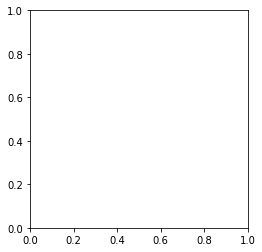

In [114]:
show_batch(images)

In [115]:
images[0
]

tensor([[   0,    0,    0,    0,    0,  255,  255,  255,  255,  255,
          255,  255,    0,    0,    0,    0,    0,    0,    0,    0],
        [   0,    0,    0,  255,  255,  255,  255,  255,  255,  255,
          255,  255,  255,  255,  255,    0,    0,    0,    0,    0],
        [   0,    0,    0,  255,  255,  255,  255,  255,  255,  255,
          255,  255,  255,  255,  255,  255,  255,    0,    0,    0],
        [   0,    0,  255,  255,  255,  255,  255,  255,  255,    0,
            0,    0,  255,  255,  255,  255,  255,  255,    0,    0],
        [   0,    0,  255,  255,  255,  255,  255,  255,    0,    0,
            0,    0,    0,  255,  255,  255,  255,  255,    0,    0],
        [ 255,  255,  255,  255,  255,  255,  255,    0,    0,    0,
            0,    0,    0,    0,  255,  255,  255,  255,  255,    0],
        [ 255,  255,  255,  255,  255,  255,  255,    0,    0,    0,
            0,    0,    0,    0,  255,  255,  255,  255,  255,    0],
        [ 255,  255,  255, 

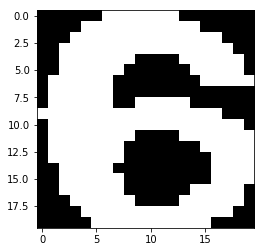

In [120]:
show_batch(images[4])

In [121]:
labels

tensor([ 0,  2,  2,  1,  6])

In [123]:
def show_batch(batch):
    im = torchvision.utils.make_grid(batch)
    plt.imshow(im)


TypeError: Invalid dimensions for image data

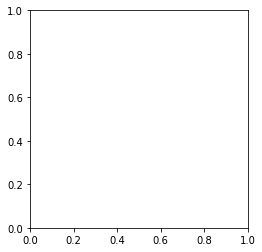

In [124]:
show_batch(images)

In [3]:
DatasetModel.query.all

RuntimeError: No application found. Either work inside a view function or push an application context. See http://flask-sqlalchemy.pocoo.org/contexts/.

In [2]:
from captchabreakerweb import app
from captchabreakerweb.models import *


/usr/local/lib64/python3.6/site-packages/flask_sqlalchemy/__init__.py:794: FSADeprecationWarning: SQLALCHEMY_TRACK_MODIFICATIONS adds significant overhead and will be disabled by default in the future.  Set it to True or False to suppress this warning.
  'SQLALCHEMY_TRACK_MODIFICATIONS adds significant overhead and '


In [4]:
DatasetModel.query.all

RuntimeError: No application found. Either work inside a view function or push an application context. See http://flask-sqlalchemy.pocoo.org/contexts/.

In [5]:
app.app_context().push()


In [7]:
DatasetModel.query.all()

[<DatasetModel datovka_labeled_small.zip>,
 <DatasetModel datovka_labeled_all.zip>]

In [8]:
d=DatasetModel.query.get(2)

In [9]:
d

<DatasetModel datovka_labeled_all.zip>

In [10]:
d.original_images

[<OriginalImage 59814>,
 <OriginalImage 53613>,
 <OriginalImage 70148>,
 <OriginalImage 10838>,
 <OriginalImage 46185>,
 <OriginalImage 27700>,
 <OriginalImage 48400>,
 <OriginalImage 48344>,
 <OriginalImage 63169>,
 <OriginalImage 56972>,
 <OriginalImage 62309>,
 <OriginalImage 13747>,
 <OriginalImage 20088>,
 <OriginalImage 24399>,
 <OriginalImage 37691>,
 <OriginalImage 73015>,
 <OriginalImage 84801>,
 <OriginalImage 59795>,
 <OriginalImage 57729>,
 <OriginalImage 38294>,
 <OriginalImage 28682>,
 <OriginalImage 95208>,
 <OriginalImage 15920>,
 <OriginalImage 53972>,
 <OriginalImage 34517>,
 <OriginalImage 35884>,
 <OriginalImage 31379>,
 <OriginalImage 68582>,
 <OriginalImage 48855>,
 <OriginalImage 44664>,
 <OriginalImage 45186>,
 <OriginalImage 85966>,
 <OriginalImage 27514>,
 <OriginalImage 28770>,
 <OriginalImage 87443>,
 <OriginalImage 42085>,
 <OriginalImage 13592>,
 <OriginalImage 65200>,
 <OriginalImage 69182>,
 <OriginalImage 29498>,
 <OriginalImage 45105>,
 <OriginalImage 

In [11]:
d.original_images.query.filter_by('id'=2)

SyntaxError: keyword can't be an expression (<ipython-input-11-cd57004422fe>, line 1)

In [12]:
d.original_images.query

AttributeError: 'InstrumentedList' object has no attribute 'query'

In [13]:
from captchabreakerweb import app
from captchabreakerweb.models import *
import numpy as np
import torch
import torch.utils.data
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.autograd import Variable

# to plot loss
import matplotlib.pyplot as plt

# for timing
import timeit

class CaptchaBreakerDataset(torch.utils.data.Dataset):

    def __init__(self, db_model, indexes=None):
        self.dataset_model = db_model
        self.indexes = indexes
        self.characters = self.dataset_model.known_characters

    def __len__(self):
        return self.size

    def __getitem__(self, item):
        image_number = item // self.dataset_model.characters_per_image
        character_number = item % self.dataset_model.characters_per_image
        character = self.dataset_model.original_images[image_number].characters[character_number]
        return (torch.from_numpy((np.fromstring(character.data, dtype=np.uint8).astype(dtype=np.float32)/255).reshape([1, 20, 20])),
               self.characters.index(str(character.character)))


app.app_context().push()

model_all = DatasetModel.query.get(2)

#print(model_all.original_images[0].characters[0].data)

a = np.fromstring(model_all.original_images[0].characters[0].data, dtype=np.uint8).astype(float).reshape([1, 20, 20])/255
#print(a)

t = torch.from_numpy(a)
#print(t)

dataset = CaptchaBreakerDataset(model_all)


batch_size = 5
kernel_sz = (5,5)
epochs = 25

train_set = None
test_set = None

train_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

# for plots
loss_array = []
epoch_loss_array = []

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # define all the components that will be used in the NN (these can be reused)
        self.conv1 = nn.Conv2d(1, 10, kernel_size=kernel_sz)  # 1 input feature, 10 output filters
        print(self.conv1.stride)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=kernel_sz)  # 10 input filters, 20 output filters
        self.mp = nn.MaxPool2d(2, padding=0)
        self.drop2D = nn.Dropout2d(p=0.25, inplace=False)
        self.fc1 = nn.Linear(80,
                             40)  # the 320 is dimensional result after max pooling and applying the kernel, 10 outputs
        self.fc2 = nn.Linear(40, 10)

    def forward(self, x):
        # define the acutal network
        in_size = x.size(0)  # this is the batch size
        # you can chain function together to form the layers
        x = F.relu(self.mp(self.conv1(x)))
        x = F.relu(self.mp(self.conv2(x)))
        #x = self.drop2D(x)
        x = x.view(in_size, -1)  # flatten data, -1 is inferred from the other dimensions (which is 320 here)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


##############################################################################
# initialize model and optimizer
##############################################################################
net = Net()

# standard gradient decent (defining the learning rate and momentum)
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)


##############################################################################
# Define functions
##############################################################################
# the training function, looping over the batches
def train(epoch):
    net.train()  # set the model in "training mode"

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)

        optimizer.zero_grad()  # necessary for new sum of gradients
        output = net(data)  # call the forward() function (forward pass of network)
        loss = F.nll_loss(output, target)  # use negative log likelihood to determine loss
        loss.backward()  # backward pass of network (calculate sum of gradients for graph)
        optimizer.step()  # perform model perameter update (update weights)

        # for graphing puposes
        loss_array.append(loss.data[0])

        # print the current status of training
        if (batch_idx % 100 == 0):
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader), loss.data[0]))


# the test function
def test(epoch):
    net.eval()  # set the model in "testing mode" (won't update parameters)
    test_loss = 0
    correct = 0

    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(
            target)  # volatile=True, since the test data should not be used to train... cancel backpropagation
        output = net(data)
        test_loss += F.nll_loss(output, target, size_average=False).data[
            0]  # fsize_average=False to sum, instead of average losses
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(
            target.data.view_as(pred)).cpu().sum()  # to operate on variables they need to be on the CPU again

    test_dat_len = len(test_loader.dataset)
    test_loss /= test_dat_len

    # print the test accuracy
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, test_dat_len, 100. * correct / test_dat_len))

(1, 1)


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:42: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


In [14]:
    for epoch in range(1, epochs):
        start_time = timeit.default_timer()

        train(epoch)
        test(epoch)

        elapsed = timeit.default_timer() - start_time
        print("Epoch time is", elapsed, "s\n")

AttributeError: 'CaptchaBreakerDataset' object has no attribute 'size'

In [15]:
from captchabreakerweb import app
from captchabreakerweb.models import *
import numpy as np
import torch
import torch.utils.data
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.autograd import Variable

# to plot loss
import matplotlib.pyplot as plt

# for timing
import timeit

class CaptchaBreakerDataset(torch.utils.data.Dataset):

    def __init__(self, db_model, indexes=None):
        self.dataset_model = db_model
        self.indexes = indexes
        self.size = self.dataset_model.characters_per_image * len(self.dataset_model.original_images)
        self.characters = self.dataset_model.known_characters

    def __len__(self):
        return self.size

    def __getitem__(self, item):
        image_number = item // self.dataset_model.characters_per_image
        character_number = item % self.dataset_model.characters_per_image
        character = self.dataset_model.original_images[image_number].characters[character_number]
        return (torch.from_numpy((np.fromstring(character.data, dtype=np.uint8).astype(dtype=np.float32)/255).reshape([1, 20, 20])),
               self.characters.index(str(character.character)))


app.app_context().push()

model_all = DatasetModel.query.get(2)

#print(model_all.original_images[0].characters[0].data)

a = np.fromstring(model_all.original_images[0].characters[0].data, dtype=np.uint8).astype(float).reshape([1, 20, 20])/255
#print(a)

t = torch.from_numpy(a)
#print(t)

dataset = CaptchaBreakerDataset(model_all)


batch_size = 5
kernel_sz = (5,5)
epochs = 25

train_set = None
test_set = None

train_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

# for plots
loss_array = []
epoch_loss_array = []

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # define all the components that will be used in the NN (these can be reused)
        self.conv1 = nn.Conv2d(1, 10, kernel_size=kernel_sz)  # 1 input feature, 10 output filters
        print(self.conv1.stride)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=kernel_sz)  # 10 input filters, 20 output filters
        self.mp = nn.MaxPool2d(2, padding=0)
        self.drop2D = nn.Dropout2d(p=0.25, inplace=False)
        self.fc1 = nn.Linear(80,
                             40)  # the 320 is dimensional result after max pooling and applying the kernel, 10 outputs
        self.fc2 = nn.Linear(40, 10)

    def forward(self, x):
        # define the acutal network
        in_size = x.size(0)  # this is the batch size
        # you can chain function together to form the layers
        x = F.relu(self.mp(self.conv1(x)))
        x = F.relu(self.mp(self.conv2(x)))
        #x = self.drop2D(x)
        x = x.view(in_size, -1)  # flatten data, -1 is inferred from the other dimensions (which is 320 here)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


##############################################################################
# initialize model and optimizer
##############################################################################
net = Net()

# standard gradient decent (defining the learning rate and momentum)
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)


##############################################################################
# Define functions
##############################################################################
# the training function, looping over the batches
def train(epoch):
    net.train()  # set the model in "training mode"

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)

        optimizer.zero_grad()  # necessary for new sum of gradients
        output = net(data)  # call the forward() function (forward pass of network)
        loss = F.nll_loss(output, target)  # use negative log likelihood to determine loss
        loss.backward()  # backward pass of network (calculate sum of gradients for graph)
        optimizer.step()  # perform model perameter update (update weights)

        # for graphing puposes
        loss_array.append(loss.data[0])

        # print the current status of training
        if (batch_idx % 100 == 0):
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader), loss.data[0]))


# the test function
def test(epoch):
    net.eval()  # set the model in "testing mode" (won't update parameters)
    test_loss = 0
    correct = 0

    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(
            target)  # volatile=True, since the test data should not be used to train... cancel backpropagation
        output = net(data)
        test_loss += F.nll_loss(output, target, size_average=False).data[
            0]  # fsize_average=False to sum, instead of average losses
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(
            target.data.view_as(pred)).cpu().sum()  # to operate on variables they need to be on the CPU again

    test_dat_len = len(test_loader.dataset)
    test_loss /= test_dat_len

    # print the test accuracy
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, test_dat_len, 100. * correct / test_dat_len))


##############################################################################
# Main function
##############################################################################
if __name__ == '__main__':
    for epoch in range(1, epochs):
        start_time = timeit.default_timer()

        train(epoch)
        test(epoch)

        elapsed = timeit.default_timer() - start_time
        print("Epoch time is", elapsed, "s\n")
    # plot loss
    plt.plot(loss_array)
    plt.ylabel('loss')
    plt.xlabel('iterations')
    plt.show()



/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:43: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:33: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:89: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:125: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:131: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a 

(1, 1)
Train Epoch: 1 [0/2220 (0%)]	Loss: 2.290563


Train Epoch: 1 [500/2220 (23%)]	Loss: 0.839004


Train Epoch: 1 [1000/2220 (45%)]	Loss: 0.582026


Train Epoch: 1 [1500/2220 (68%)]	Loss: 0.009081


Train Epoch: 1 [2000/2220 (90%)]	Loss: 0.029556


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:141: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:145: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number



Test set: Average loss: 0.4615, Accuracy: 1937/2220 (87.00%)

Epoch time is 7.581200298998738 s

Train Epoch: 2 [0/2220 (0%)]	Loss: 0.601763


Train Epoch: 2 [500/2220 (23%)]	Loss: 0.015846


Train Epoch: 2 [1000/2220 (45%)]	Loss: 0.037800


Train Epoch: 2 [1500/2220 (68%)]	Loss: 0.105730


Train Epoch: 2 [2000/2220 (90%)]	Loss: 0.012203



Test set: Average loss: 0.1124, Accuracy: 2149/2220 (96.00%)

Epoch time is 2.833564849017421 s

Train Epoch: 3 [0/2220 (0%)]	Loss: 0.007621


Train Epoch: 3 [500/2220 (23%)]	Loss: 0.004745


Train Epoch: 3 [1000/2220 (45%)]	Loss: 0.007989


Train Epoch: 3 [1500/2220 (68%)]	Loss: 0.010497
Train Epoch: 3 [2000/2220 (90%)]	Loss: 0.001800



Test set: Average loss: 0.0448, Accuracy: 2198/2220 (99.00%)

Epoch time is 1.4919181050208863 s

Train Epoch: 4 [0/2220 (0%)]	Loss: 0.000315
Train Epoch: 4 [500/2220 (23%)]	Loss: 0.000484


Train Epoch: 4 [1000/2220 (45%)]	Loss: 0.000605
Train Epoch: 4 [1500/2220 (68%)]	Loss: 0.011170


Train Epoch: 4 [2000/2220 (90%)]	Loss: 0.006593



Test set: Average loss: 0.0813, Accuracy: 2166/2220 (97.00%)

Epoch time is 1.4907207999785896 s

Train Epoch: 5 [0/2220 (0%)]	Loss: 0.001417


Train Epoch: 5 [500/2220 (23%)]	Loss: 0.000014


Train Epoch: 5 [1000/2220 (45%)]	Loss: 0.003483
Train Epoch: 5 [1500/2220 (68%)]	Loss: 0.000428


Train Epoch: 5 [2000/2220 (90%)]	Loss: 0.907660



Test set: Average loss: 0.0204, Accuracy: 2205/2220 (99.00%)

Epoch time is 1.530359144002432 s

Train Epoch: 6 [0/2220 (0%)]	Loss: 0.000440
Train Epoch: 6 [500/2220 (23%)]	Loss: 0.000012


Train Epoch: 6 [1000/2220 (45%)]	Loss: 0.000233
Train Epoch: 6 [1500/2220 (68%)]	Loss: 0.015954


Train Epoch: 6 [2000/2220 (90%)]	Loss: 0.000125



Test set: Average loss: 0.0085, Accuracy: 2217/2220 (99.00%)

Epoch time is 1.5490767720039003 s

Train Epoch: 7 [0/2220 (0%)]	Loss: 0.000621


Train Epoch: 7 [500/2220 (23%)]	Loss: 0.000383


Train Epoch: 7 [1000/2220 (45%)]	Loss: 0.001642


Train Epoch: 7 [1500/2220 (68%)]	Loss: 0.000029
Train Epoch: 7 [2000/2220 (90%)]	Loss: 0.000003



Test set: Average loss: 0.0055, Accuracy: 2217/2220 (99.00%)

Epoch time is 1.389831487002084 s

Train Epoch: 8 [0/2220 (0%)]	Loss: 0.000503
Train Epoch: 8 [500/2220 (23%)]	Loss: 0.000119


Train Epoch: 8 [1000/2220 (45%)]	Loss: 0.001968
Train Epoch: 8 [1500/2220 (68%)]	Loss: 0.000405


Train Epoch: 8 [2000/2220 (90%)]	Loss: 0.000157



Test set: Average loss: 0.0303, Accuracy: 2204/2220 (99.00%)

Epoch time is 1.0423106910020579 s

Train Epoch: 9 [0/2220 (0%)]	Loss: 0.006393
Train Epoch: 9 [500/2220 (23%)]	Loss: 0.000078


Train Epoch: 9 [1000/2220 (45%)]	Loss: 0.000640
Train Epoch: 9 [1500/2220 (68%)]	Loss: 0.000229


Train Epoch: 9 [2000/2220 (90%)]	Loss: 0.003796



Test set: Average loss: 0.0731, Accuracy: 2173/2220 (97.00%)

Epoch time is 1.07240787500632 s

Train Epoch: 10 [0/2220 (0%)]	Loss: 0.089118
Train Epoch: 10 [500/2220 (23%)]	Loss: 0.000159


Train Epoch: 10 [1000/2220 (45%)]	Loss: 0.000482
Train Epoch: 10 [1500/2220 (68%)]	Loss: 0.000001


Train Epoch: 10 [2000/2220 (90%)]	Loss: 0.000002



Test set: Average loss: 0.0107, Accuracy: 2215/2220 (99.00%)

Epoch time is 1.0722283869981766 s

Train Epoch: 11 [0/2220 (0%)]	Loss: 0.000153
Train Epoch: 11 [500/2220 (23%)]	Loss: 0.000016


Train Epoch: 11 [1000/2220 (45%)]	Loss: 0.000020
Train Epoch: 11 [1500/2220 (68%)]	Loss: 0.003903


Train Epoch: 11 [2000/2220 (90%)]	Loss: 0.013910



Test set: Average loss: 0.0185, Accuracy: 2205/2220 (99.00%)

Epoch time is 1.1269823999900836 s

Train Epoch: 12 [0/2220 (0%)]	Loss: 0.000014
Train Epoch: 12 [500/2220 (23%)]	Loss: 0.000340


Train Epoch: 12 [1000/2220 (45%)]	Loss: 0.001585
Train Epoch: 12 [1500/2220 (68%)]	Loss: 0.000863


Train Epoch: 12 [2000/2220 (90%)]	Loss: 0.000055



Test set: Average loss: 0.0065, Accuracy: 2216/2220 (99.00%)

Epoch time is 1.0799760819936637 s

Train Epoch: 13 [0/2220 (0%)]	Loss: 0.000008
Train Epoch: 13 [500/2220 (23%)]	Loss: 0.000045


Train Epoch: 13 [1000/2220 (45%)]	Loss: 0.000009
Train Epoch: 13 [1500/2220 (68%)]	Loss: 0.000282


Train Epoch: 13 [2000/2220 (90%)]	Loss: 0.000229



Test set: Average loss: 0.0059, Accuracy: 2216/2220 (99.00%)

Epoch time is 1.035145055007888 s

Train Epoch: 14 [0/2220 (0%)]	Loss: 0.000003
Train Epoch: 14 [500/2220 (23%)]	Loss: 0.000025


Train Epoch: 14 [1000/2220 (45%)]	Loss: 0.000266
Train Epoch: 14 [1500/2220 (68%)]	Loss: 0.000056


Train Epoch: 14 [2000/2220 (90%)]	Loss: 0.000145



Test set: Average loss: 0.0050, Accuracy: 2217/2220 (99.00%)

Epoch time is 1.064703330019256 s

Train Epoch: 15 [0/2220 (0%)]	Loss: 0.000109
Train Epoch: 15 [500/2220 (23%)]	Loss: 0.000137


Train Epoch: 15 [1000/2220 (45%)]	Loss: 0.001401
Train Epoch: 15 [1500/2220 (68%)]	Loss: 0.000008


Train Epoch: 15 [2000/2220 (90%)]	Loss: 0.020000



Test set: Average loss: 0.0050, Accuracy: 2217/2220 (99.00%)

Epoch time is 1.1348621849901974 s

Train Epoch: 16 [0/2220 (0%)]	Loss: 0.000088
Train Epoch: 16 [500/2220 (23%)]	Loss: 0.000127


Train Epoch: 16 [1000/2220 (45%)]	Loss: 0.000000
Train Epoch: 16 [1500/2220 (68%)]	Loss: 0.000544


Train Epoch: 16 [2000/2220 (90%)]	Loss: 0.002529



Test set: Average loss: 0.0030, Accuracy: 2217/2220 (99.00%)

Epoch time is 1.1089895059994888 s

Train Epoch: 17 [0/2220 (0%)]	Loss: 0.000025
Train Epoch: 17 [500/2220 (23%)]	Loss: 0.000120


Train Epoch: 17 [1000/2220 (45%)]	Loss: 0.000159
Train Epoch: 17 [1500/2220 (68%)]	Loss: 0.000071


Train Epoch: 17 [2000/2220 (90%)]	Loss: 0.000079



Test set: Average loss: 0.0038, Accuracy: 2217/2220 (99.00%)

Epoch time is 1.06565930499346 s

Train Epoch: 18 [0/2220 (0%)]	Loss: 0.000010
Train Epoch: 18 [500/2220 (23%)]	Loss: 0.000069


Train Epoch: 18 [1000/2220 (45%)]	Loss: 0.000212
Train Epoch: 18 [1500/2220 (68%)]	Loss: 0.000184


Train Epoch: 18 [2000/2220 (90%)]	Loss: 0.000281



Test set: Average loss: 0.0035, Accuracy: 2217/2220 (99.00%)

Epoch time is 1.1031263229961041 s

Train Epoch: 19 [0/2220 (0%)]	Loss: 0.000002
Train Epoch: 19 [500/2220 (23%)]	Loss: 0.000000


Train Epoch: 19 [1000/2220 (45%)]	Loss: 0.000112
Train Epoch: 19 [1500/2220 (68%)]	Loss: 0.000003


Train Epoch: 19 [2000/2220 (90%)]	Loss: 0.000012



Test set: Average loss: 0.0031, Accuracy: 2217/2220 (99.00%)

Epoch time is 1.1367782599991187 s

Train Epoch: 20 [0/2220 (0%)]	Loss: 0.000688
Train Epoch: 20 [500/2220 (23%)]	Loss: 0.000131


Train Epoch: 20 [1000/2220 (45%)]	Loss: 0.000193
Train Epoch: 20 [1500/2220 (68%)]	Loss: 0.000093


Train Epoch: 20 [2000/2220 (90%)]	Loss: 0.016250



Test set: Average loss: 0.0028, Accuracy: 2218/2220 (99.00%)

Epoch time is 1.1069456949771848 s

Train Epoch: 21 [0/2220 (0%)]	Loss: 0.000030
Train Epoch: 21 [500/2220 (23%)]	Loss: 0.000030


Train Epoch: 21 [1000/2220 (45%)]	Loss: 0.000043
Train Epoch: 21 [1500/2220 (68%)]	Loss: 0.000762


Train Epoch: 21 [2000/2220 (90%)]	Loss: 0.001575



Test set: Average loss: 0.0021, Accuracy: 2218/2220 (99.00%)

Epoch time is 1.1087879549886566 s

Train Epoch: 22 [0/2220 (0%)]	Loss: 0.000006
Train Epoch: 22 [500/2220 (23%)]	Loss: 0.000000


Train Epoch: 22 [1000/2220 (45%)]	Loss: 0.000317
Train Epoch: 22 [1500/2220 (68%)]	Loss: 0.000022


Train Epoch: 22 [2000/2220 (90%)]	Loss: 0.495063



Test set: Average loss: 0.0035, Accuracy: 2217/2220 (99.00%)

Epoch time is 1.073150145006366 s

Train Epoch: 23 [0/2220 (0%)]	Loss: 0.000087
Train Epoch: 23 [500/2220 (23%)]	Loss: 0.000002


Train Epoch: 23 [1000/2220 (45%)]	Loss: 0.000003
Train Epoch: 23 [1500/2220 (68%)]	Loss: 0.000014


Train Epoch: 23 [2000/2220 (90%)]	Loss: 0.000117



Test set: Average loss: 0.0021, Accuracy: 2218/2220 (99.00%)

Epoch time is 1.0572460480034351 s

Train Epoch: 24 [0/2220 (0%)]	Loss: 0.000002
Train Epoch: 24 [500/2220 (23%)]	Loss: 0.000002


Train Epoch: 24 [1000/2220 (45%)]	Loss: 0.000654
Train Epoch: 24 [1500/2220 (68%)]	Loss: 0.000247


Train Epoch: 24 [2000/2220 (90%)]	Loss: 0.000165



Test set: Average loss: 0.0017, Accuracy: 2218/2220 (99.00%)

Epoch time is 1.0173098870145623 s



In [16]:
net

Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (mp): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop2D): Dropout2d(p=0.25)
  (fc1): Linear(in_features=80, out_features=40, bias=True)
  (fc2): Linear(in_features=40, out_features=10, bias=True)
)

In [18]:
data, target = dataset.__getitem__(0)


In [19]:
target

5

In [21]:
data, target = Variable(data, volatile=True), Variable(
            target)  #

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  """Entry point for launching an IPython kernel.


TypeError: Variable data has to be a tensor, but got int

In [22]:
data

tensor([[[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,
           1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
           1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
         [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,
           1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  1.,  1

In [23]:
Variable(data)

tensor([[[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,
           1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
           1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
         [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,
           1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  1.,  1

In [25]:
o=net(data)

RuntimeError: expected stride to be a single integer value or a list of 1 values to match the convolution dimensions, but got stride=[1, 1]

In [27]:
data.size()

torch.Size([1, 20, 20])

In [2]:
from captchabreakerweb import app

In [3]:
from captchabreakerweb import celery


In [4]:
app.app_context().push()

In [5]:
from captchabreakerweb.tasks.process_dataset import *


In [6]:
long_task

<@task: captchabreakerweb.tasks.process_dataset.long_task of default at 0x7f31ea97b9e8 (v2 compatible)>

In [7]:
long_task()

{'current': 100, 'result': 42, 'status': 'Task completed!', 'total': 100}

In [8]:
print(2)

KeyboardInterrupt: 

In [9]:
2

In [10]:
celery

<module 'celery' from '/usr/local/lib/python3.6/site-packages/celery/__init__.py'>

In [11]:
long

In [1]:
long_task


NameError: name 'long_task' is not defined

In [2]:
from captchabreakerweb.tasks import process_dataset


In [5]:
process_dataset.short_task.delay()

KeyboardInterrupt: 

In [6]:
2

In [8]:
from captchabreakerweb import app
from captchabreakerweb.models import *
import numpy as np
import torch
import torch.utils.data
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.autograd import Variable

# to plot loss
import matplotlib.pyplot as plt

# for timing
import timeit

class CaptchaBreakerDataset(torch.utils.data.Dataset):

    def __init__(self, db_model, test=False):
        self.dataset_model = db_model
        self.test = test
        self.size = (self.dataset_model.characters_per_image * len(self.dataset_model.original_images))
        self.characters = self.dataset_model.known_characters

    def __len__(self):
        return self.size

    def __getitem__(self, item):
        image_number = item // self.dataset_model.characters_per_image
        character_number = item % self.dataset_model.characters_per_image
        character = self.dataset_model.original_images[image_number].characters[character_number]
        return (torch.from_numpy((np.fromstring(character.data, dtype=np.uint8).astype(dtype=np.float32)/255).reshape([1, 20, 20])),
               self.characters.index(str(character.character)))


class CaptchaNFoldVerifier(object):

    def __init__(self, db_model, net):
        self.dataset_model = db_model
        self.net = net

    def verify(self):
        return None


app.app_context().push()

model_all = DatasetModel.query.get(2)

#print(model_all.original_images[0].characters[0].data)

a = np.fromstring(model_all.original_images[0].characters[0].data, dtype=np.uint8).astype(float).reshape([1, 20, 20])/255
#print(a)

t = torch.from_numpy(a)
#print(t)

train_dataset = CaptchaBreakerDataset(model_all)
test_dataset = CaptchaBreakerDataset(model_all, test=True)


batch_size = 10
kernel_sz = (5,5)
epochs = 10

train_set = None
test_set = None

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

# for plots
loss_array = []
epoch_loss_array = []

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # define all the components that will be used in the NN (these can be reused)
        self.conv1 = nn.Conv2d(1, 10, kernel_size=kernel_sz, padding=2)  # 1 input feature, 10 output filters
        print(self.conv1.stride)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=kernel_sz, padding=2)  # 10 input filters, 20 output filters
        self.mp = nn.MaxPool2d(2, padding=0)
        self.drop2D = nn.Dropout2d(p=0.25, inplace=False)
        self.fc1 = nn.Linear(500,
                             90)  # the 320 is dimensional result after max pooling and applying the kernel, 10 outputs
        self.fc2 = nn.Linear(90, 10)

    def forward(self, x):
        # define the acutal network
        in_size = x.size(0)  # this is the batch size
        # you can chain function together to form the layers
        x = F.relu(self.mp(self.conv1(x)))
        x = F.relu(self.mp(self.conv2(x)))
        #x = self.drop2D(x)
        x = x.view(in_size, -1)  # flatten data, -1 is inferred from the other dimensions (which is 320 here)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


##############################################################################
# initialize model and optimizer
##############################################################################
net = Net()

# standard gradient decent (defining the learning rate and momentum)
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)


##############################################################################
# Define functions
##############################################################################
# the training function, looping over the batches
def train(epoch):
    net.train()  # set the model in "training mode"

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)

        optimizer.zero_grad()  # necessary for new sum of gradients
        output = net(data)  # call the forward() function (forward pass of network)
        loss = F.nll_loss(output, target)  # use negative log likelihood to determine loss
        loss.backward()  # backward pass of network (calculate sum of gradients for graph)
        optimizer.step()  # perform model perameter update (update weights)

        # for graphing puposes
        loss_array.append(loss.data[0])

        # print the current status of training
        if (batch_idx % 100 == 0):
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader), loss.data[0]))


# the test function
def test(epoch):
    net.eval()  # set the model in "testing mode" (won't update parameters)
    test_loss = 0
    correct = 0

    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(
            target)  # volatile=True, since the test data should not be used to train... cancel backpropagation
        output = net(data)
        test_loss += F.nll_loss(output, target, size_average=False).data[
            0]  # fsize_average=False to sum, instead of average losses
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(
            target.data.view_as(pred)).cpu().sum()  # to operate on variables they need to be on the CPU again

    test_dat_len = len(test_loader.dataset)
    test_loss /= test_dat_len

    # print the test accuracy
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, test_dat_len, 100. * correct / test_dat_len))


##############################################################################
# Main function
##############################################################################
if __name__ == '__main__':
    for epoch in range(1, epochs):
        start_time = timeit.default_timer()

        train(epoch)
        test(epoch)

        elapsed = timeit.default_timer() - start_time
        print("Epoch time is", elapsed, "s\n")
    # plot loss
    # plt.plot(loss_array)
    # plt.ylabel('loss')
    # plt.xlabel('iterations')
    # plt.show()



/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:53: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:33: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:100: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:136: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:142: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a

(1, 1)
Train Epoch: 1 [0/2220 (0%)]	Loss: 2.320452


Train Epoch: 1 [1000/2220 (45%)]	Loss: 0.229473


Train Epoch: 1 [2000/2220 (90%)]	Loss: 0.013646


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:152: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:156: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number



Test set: Average loss: 0.0535, Accuracy: 2196/2220 (98.00%)

Epoch time is 1.9231461900053546 s

Train Epoch: 2 [0/2220 (0%)]	Loss: 0.012894


Train Epoch: 2 [1000/2220 (45%)]	Loss: 0.002398


Train Epoch: 2 [2000/2220 (90%)]	Loss: 0.008388



Test set: Average loss: 0.0233, Accuracy: 2211/2220 (99.00%)

Epoch time is 1.7644809969933704 s

Train Epoch: 3 [0/2220 (0%)]	Loss: 0.005018


Train Epoch: 3 [1000/2220 (45%)]	Loss: 0.000099


Train Epoch: 3 [2000/2220 (90%)]	Loss: 0.000147



Test set: Average loss: 0.0130, Accuracy: 2215/2220 (99.00%)

Epoch time is 1.747365657996852 s

Train Epoch: 4 [0/2220 (0%)]	Loss: 0.000332


Train Epoch: 4 [1000/2220 (45%)]	Loss: 0.000448


Train Epoch: 4 [2000/2220 (90%)]	Loss: 0.008782



Test set: Average loss: 0.0090, Accuracy: 2217/2220 (99.00%)

Epoch time is 1.897973468003329 s

Train Epoch: 5 [0/2220 (0%)]	Loss: 0.000136


Train Epoch: 5 [1000/2220 (45%)]	Loss: 0.003135


Train Epoch: 5 [2000/2220 (90%)]	Loss: 0.000452



Test set: Average loss: 0.0181, Accuracy: 2217/2220 (99.00%)

Epoch time is 1.8993337230058387 s

Train Epoch: 6 [0/2220 (0%)]	Loss: 0.000786


Train Epoch: 6 [1000/2220 (45%)]	Loss: 0.000624


Train Epoch: 6 [2000/2220 (90%)]	Loss: 0.000153



Test set: Average loss: 0.0077, Accuracy: 2217/2220 (99.00%)

Epoch time is 1.816217529005371 s

Train Epoch: 7 [0/2220 (0%)]	Loss: 0.001210


Train Epoch: 7 [1000/2220 (45%)]	Loss: 0.000149


Train Epoch: 7 [2000/2220 (90%)]	Loss: 0.000260



Test set: Average loss: 0.0070, Accuracy: 2217/2220 (99.00%)

Epoch time is 1.7460921609890647 s

Train Epoch: 8 [0/2220 (0%)]	Loss: 0.002368


Train Epoch: 8 [1000/2220 (45%)]	Loss: 0.007465


Train Epoch: 8 [2000/2220 (90%)]	Loss: 0.000219



Test set: Average loss: 0.0146, Accuracy: 2216/2220 (99.00%)

Epoch time is 1.7867579470039345 s

Train Epoch: 9 [0/2220 (0%)]	Loss: 0.020204


Train Epoch: 9 [1000/2220 (45%)]	Loss: 0.004916


Train Epoch: 9 [2000/2220 (90%)]	Loss: 0.000119



Test set: Average loss: 0.0058, Accuracy: 2217/2220 (99.00%)

Epoch time is 1.763514395977836 s



In [9]:
net

In [10]:
print(net)

In [11]:
type(net)

__main__.Net

In [12]:
net.parameters()

<generator object Module.parameters at 0x7f506405b3b8>

In [13]:
net.state_dict()

OrderedDict([('conv1.weight',
              tensor([[[[-0.0136,  0.1723,  0.2615,  0.0706, -0.0547],
                        [ 0.1117, -0.0104,  0.1869, -0.0782,  0.0842],
                        [ 0.0515,  0.1937,  0.2206,  0.0085, -0.2839],
                        [ 0.1174,  0.1129,  0.0153, -0.2832, -0.2886],
                        [ 0.0957, -0.1161,  0.1143, -0.0103, -0.2569]]],
              
              
                      [[[-0.2182, -0.1819, -0.2282, -0.1581, -0.2208],
                        [ 0.0571,  0.1431, -0.1911, -0.1855, -0.1516],
                        [-0.0045,  0.0361, -0.0870, -0.1910, -0.0342],
                        [ 0.1879, -0.0020,  0.2263,  0.0139, -0.0564],
                        [ 0.2562,  0.3166,  0.1226, -0.0069,  0.0807]]],
              
              
                      [[[ 0.2618,  0.2491, -0.0028,  0.1743,  0.2238],
                        [ 0.0789, -0.0011,  0.0710, -0.1924,  0.0115],
                        [-0.1360, -0.1235, -0.0327, -0

In [15]:
n2 = Net()

(1, 1)


In [16]:
n2

In [17]:
n2.load_state_dict(net.state_dict())

In [18]:
n2.state

AttributeError: 'Net' object has no attribute 'state'

In [20]:
n2.state_dict()

OrderedDict([('conv1.weight',
              tensor([[[[-0.0136,  0.1723,  0.2615,  0.0706, -0.0547],
                        [ 0.1117, -0.0104,  0.1869, -0.0782,  0.0842],
                        [ 0.0515,  0.1937,  0.2206,  0.0085, -0.2839],
                        [ 0.1174,  0.1129,  0.0153, -0.2832, -0.2886],
                        [ 0.0957, -0.1161,  0.1143, -0.0103, -0.2569]]],
              
              
                      [[[-0.2182, -0.1819, -0.2282, -0.1581, -0.2208],
                        [ 0.0571,  0.1431, -0.1911, -0.1855, -0.1516],
                        [-0.0045,  0.0361, -0.0870, -0.1910, -0.0342],
                        [ 0.1879, -0.0020,  0.2263,  0.0139, -0.0564],
                        [ 0.2562,  0.3166,  0.1226, -0.0069,  0.0807]]],
              
              
                      [[[ 0.2618,  0.2491, -0.0028,  0.1743,  0.2238],
                        [ 0.0789, -0.0011,  0.0710, -0.1924,  0.0115],
                        [-0.1360, -0.1235, -0.0327, -0

In [21]:
d=net.state_dict()

In [22]:
d

OrderedDict([('conv1.weight',
              tensor([[[[-0.0136,  0.1723,  0.2615,  0.0706, -0.0547],
                        [ 0.1117, -0.0104,  0.1869, -0.0782,  0.0842],
                        [ 0.0515,  0.1937,  0.2206,  0.0085, -0.2839],
                        [ 0.1174,  0.1129,  0.0153, -0.2832, -0.2886],
                        [ 0.0957, -0.1161,  0.1143, -0.0103, -0.2569]]],
              
              
                      [[[-0.2182, -0.1819, -0.2282, -0.1581, -0.2208],
                        [ 0.0571,  0.1431, -0.1911, -0.1855, -0.1516],
                        [-0.0045,  0.0361, -0.0870, -0.1910, -0.0342],
                        [ 0.1879, -0.0020,  0.2263,  0.0139, -0.0564],
                        [ 0.2562,  0.3166,  0.1226, -0.0069,  0.0807]]],
              
              
                      [[[ 0.2618,  0.2491, -0.0028,  0.1743,  0.2238],
                        [ 0.0789, -0.0011,  0.0710, -0.1924,  0.0115],
                        [-0.1360, -0.1235, -0.0327, -0

In [23]:
json

NameError: name 'json' is not defined

In [25]:
import json

In [26]:
json.dump(d)

In [28]:
json.dumps(d)

TypeError: Object of type 'Tensor' is not JSON serializable

In [30]:
pickle

NameError: name 'pickle' is not defined

In [31]:
import pickle

In [33]:
a=pickle.dumps(d)

In [34]:
len(a)

462337

In [36]:
from captchabreakerweb.models import ClasificatorModel


In [38]:
db


In [5]:
db.session.add(ClasificatorModel(name="FOO"))

NameError: name 'db' is not defined

In [49]:
ClasificatorModel(name="SDF")

TypeError: 'module' object is not callable

In [44]:
ClasificatorModel

<module 'captchabreakerweb.models.ClasificatorModel' from '/home/kamil/git/CaptchaBreaker/captchabreakerweb/models/ClasificatorModel.py'>

In [47]:
from captchabreakerweb.models import ClasificatorModel

In [1]:
ClasificatorModel(name="SDF")

NameError: name 'ClasificatorModel' is not defined

In [2]:
from captchabreakerweb.models import  ClasificatorModel

In [3]:
ClasificatorModel(name="SDF")

<Clasificator SDF>

In [4]:
ClasificatorModel(name="SDF").save()

AttributeError: 'ClasificatorModel' object has no attribute 'save'

In [7]:
from captchabreakerweb.models import db

In [8]:
db.session.add(ClasificatorModel(name="FOO"))

RuntimeError: No application found. Either work inside a view function or push an application context. See http://flask-sqlalchemy.pocoo.org/contexts/.

In [9]:
from captchabreakerweb import app

In [11]:
app.app_context().push()

In [12]:
db.session.add(ClasificatorModel(name="FOO"))

In [13]:
db.session.commit()

In [14]:
DatasetModel.query.get(1)

NameError: name 'DatasetModel' is not defined

In [15]:
ClasificatorModel.query.get(1)

<Clasificator FOO>

In [18]:
a=ClasificatorModel.query.get(2)

In [19]:
a

<Clasificator sdfxcv>

In [20]:
import base64

In [21]:
a.net

AttributeError: 'ClasificatorModel' object has no attribute 'net'

In [22]:
a.network

b'gANjY29sbGVjdGlvbnMKT3JkZXJlZERpY3QKcQApUnEBKFgMAAAAY29udjEud2VpZ2h0cQJjdG9yY2guX3V0aWxzCl9yZWJ1aWxkX3RlbnNvcl92MgpxAyhjdG9yY2gKRmxvYXRTdG9yYWdlCnEEXXEFKEe/tdQMgAAAAEc/sgGfQAAAAEe/yrAmwAAAAEe/wwR/wAAAAEe/uLyyYAAAAEc/wGO2AAAAAEe/q7QggAAAAEc/xXkrYAAAAEe/sCTqAAAAAEc/oLXjwAAAAEc/0IOX4AAAAEe/l9jCAAAAAEc/uUJJgAAAAEc/wdZjwAAAAEc/oo7SAAAAAEe/mBrlAAAAAEc/0OnV4AAAAEc/wFtdoAAAAEc/xbeYAAAAAEe/xhNOAAAAAEc/Qf9KgAAAAEc/sefnwAAAAEe/uhGMoAAAAEc/wGY3oAAAAEe/wRz2AAAAAEc/wfqEAAAAAEc/26x4oAAAAEc/3KJZIAAAAEc/wwd1YAAAAEc/y3OYQAAAAEc/uwrvwAAAAEc/1yiSwAAAAEc/zQinwAAAAEc/0mXAoAAAAEc/0plaoAAAAEc/0k6MwAAAAEc/1TqT4AAAAEc/vHWJ4AAAAEc/wd/ZQAAAAEc/xs96YAAAAEc/1MVSIAAAAEc/2PYjYAAAAEc/w9cnIAAAAEc/vV7w4AAAAEc/sJT4gAAAAEc/geJDQAAAAEc/1Kr5AAAAAEe/jEMZgAAAAEe/s9GgQAAAAEe/w9E9oAAAAEc/vKdB4AAAAEc/yycfIAAAAEc/xa+m4AAAAEc/xAtZgAAAAEc/rLEJoAAAAEc/sPV6gAAAAEe/sIlxgAAAAEe/nqYswAAAAEe/nHYeYAAAAEc/ycpsoAAAAEc/rkliAAAAAEe/uCdEAAAAAEc/m+IHoAAAAEc/zeYQYAAAAEe/u344QAAAAEe/wPYXYAAAAEc/vTWNAAAAAEc/wrDpAAAAAEc/z0vJwAAAAEe/pIf4gAAAAEc/tX

In [23]:
c=CNN()

NameError: name 'CNN' is not defined

In [24]:
Net()

NameError: name 'Net' is not defined

In [26]:
from captchabreakerweb import app
from captchabreakerweb.models import *
import numpy as np
import torch
import torch.utils.data
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.autograd import Variable

# to plot loss
import matplotlib.pyplot as plt

# for timing
import timeit

class CaptchaBreakerDataset(torch.utils.data.Dataset):

    def __init__(self, db_model, test=False):
        self.dataset_model = db_model
        self.test = test
        self.size = (self.dataset_model.characters_per_image * len(self.dataset_model.original_images))
        self.characters = self.dataset_model.known_characters

    def __len__(self):
        return self.size

    def __getitem__(self, item):
        image_number = item // self.dataset_model.characters_per_image
        character_number = item % self.dataset_model.characters_per_image
        character = self.dataset_model.original_images[image_number].characters[character_number]
        return (torch.from_numpy((np.fromstring(character.data, dtype=np.uint8).astype(dtype=np.float32)/255).reshape([1, 20, 20])),
               self.characters.index(str(character.character)))


class CaptchaNFoldVerifier(object):

    def __init__(self, db_model, net):
        self.dataset_model = db_model
        self.net = net

    def verify(self):
        return None


app.app_context().push()

model_all = DatasetModel.query.get(2)

#print(model_all.original_images[0].characters[0].data)

a = np.fromstring(model_all.original_images[0].characters[0].data, dtype=np.uint8).astype(float).reshape([1, 20, 20])/255
#print(a)

t = torch.from_numpy(a)
#print(t)

train_dataset = CaptchaBreakerDataset(model_all)
test_dataset = CaptchaBreakerDataset(model_all, test=True)


batch_size = 10
kernel_sz = (5,5)
epochs = 10

train_set = None
test_set = None

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

# for plots
loss_array = []
epoch_loss_array = []

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # define all the components that will be used in the NN (these can be reused)
        self.conv1 = nn.Conv2d(1, 10, kernel_size=kernel_sz, padding=2)  # 1 input feature, 10 output filters
        print(self.conv1.stride)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=kernel_sz, padding=2)  # 10 input filters, 20 output filters
        self.mp = nn.MaxPool2d(2, padding=0)
        self.drop2D = nn.Dropout2d(p=0.25, inplace=False)
        self.fc1 = nn.Linear(500,
                             90)  # the 320 is dimensional result after max pooling and applying the kernel, 10 outputs
        self.fc2 = nn.Linear(90, 10)

    def forward(self, x):
        # define the acutal network
        in_size = x.size(0)  # this is the batch size
        # you can chain function together to form the layers
        x = F.relu(self.mp(self.conv1(x)))
        x = F.relu(self.mp(self.conv2(x)))
        #x = self.drop2D(x)
        x = x.view(in_size, -1)  # flatten data, -1 is inferred from the other dimensions (which is 320 here)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


##############################################################################
# initialize model and optimizer
##############################################################################
net = Net()

# standard gradient decent (defining the learning rate and momentum)
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)


##############################################################################
# Define functions
##############################################################################
# the training function, looping over the batches
def train(epoch):
    net.train()  # set the model in "training mode"

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)

        optimizer.zero_grad()  # necessary for new sum of gradients
        output = net(data)  # call the forward() function (forward pass of network)
        loss = F.nll_loss(output, target)  # use negative log likelihood to determine loss
        loss.backward()  # backward pass of network (calculate sum of gradients for graph)
        optimizer.step()  # perform model perameter update (update weights)

        # for graphing puposes
        loss_array.append(loss.data[0])

        # print the current status of training
        if (batch_idx % 100 == 0):
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader), loss.data[0]))


# the test function
def test(epoch):
    net.eval()  # set the model in "testing mode" (won't update parameters)
    test_loss = 0
    correct = 0

    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(
            target)  # volatile=True, since the test data should not be used to train... cancel backpropagation
        output = net(data)
        test_loss += F.nll_loss(output, target, size_average=False).data[
            0]  # fsize_average=False to sum, instead of average losses
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(
            target.data.view_as(pred)).cpu().sum()  # to operate on variables they need to be on the CPU again

    test_dat_len = len(test_loader.dataset)
    test_loss /= test_dat_len

    # print the test accuracy
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, test_dat_len, 100. * correct / test_dat_len))


(1, 1)


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:53: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


In [27]:
Net

__main__.Net

In [29]:
import torch.nn as nn
import torch.nn.functional as F


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # define all the components that will be used in the NN (these can be reused)
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5, padding=2)  # 1 input feature, 10 output filters
        print(self.conv1.stride)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5, padding=2)  # 10 input filters, 20 output filters
        self.mp = nn.MaxPool2d(2, padding=0)
        self.drop2D = nn.Dropout2d(p=0.25, inplace=False)
        self.fc1 = nn.Linear(500,
                             90)  # the 320 is dimensional result after max pooling and applying the kernel, 10 outputs
        self.fc2 = nn.Linear(90, 10)

    def forward(self, x):
        # define the acutal network
        in_size = x.size(0)  # this is the batch size
        # you can chain function together to form the layers
        x = F.relu(self.mp(self.conv1(x)))
        x = F.relu(self.mp(self.conv2(x)))
        #x = self.drop2D(x)
        x = x.view(in_size, -1)  # flatten data, -1 is inferred from the other dimensions (which is 320 here)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [33]:
schema = pickle.loads(base64.b64decode(a))

EOFError: Ran out of input

In [34]:
import pickle

In [35]:
pickle.loads(base64.b64decode(a))

EOFError: Ran out of input

In [36]:
b=base64.b64decode(a)

In [37]:
type(b)

bytes

In [ ]:
pickle.loads()